In [2]:
!conda activate opencv  
#切换到opencv的虚拟环境, 你们没有用conda不用管这个命令

### 1导入一个图像

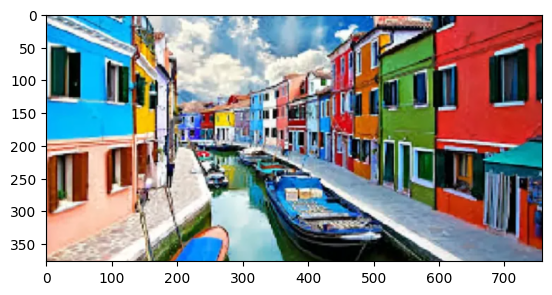

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Import the image
img = cv2.imread('burano.jpg')

plt.imshow(img)

笔记: 使用 `imread()` 读入图片
https://w3schools.cn/opencv_python/opencv_python_reading_image.html

### 2 灰度图

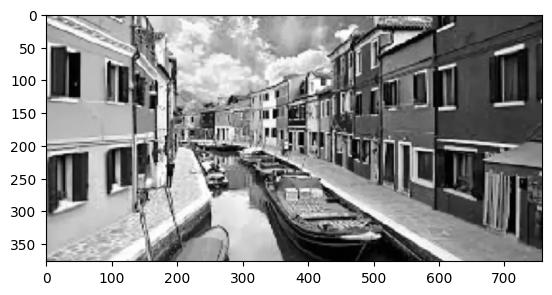

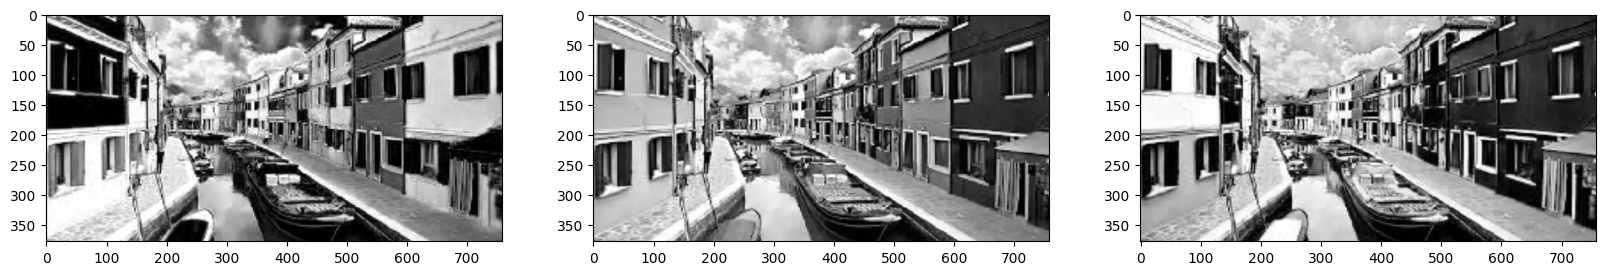

In [39]:
# Convert the image into gray scale
img_rgb = img
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap = 'gray')

# Plot the three channels of the image
fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (20, 20))

for i in range(0, 3):
    ax =axs[i]
    ax.imshow(img_rgb[:, :, i], cmap = 'gray')

plt.show()

笔记: 记得补上 `img_rgb`

### 3 转换颜色

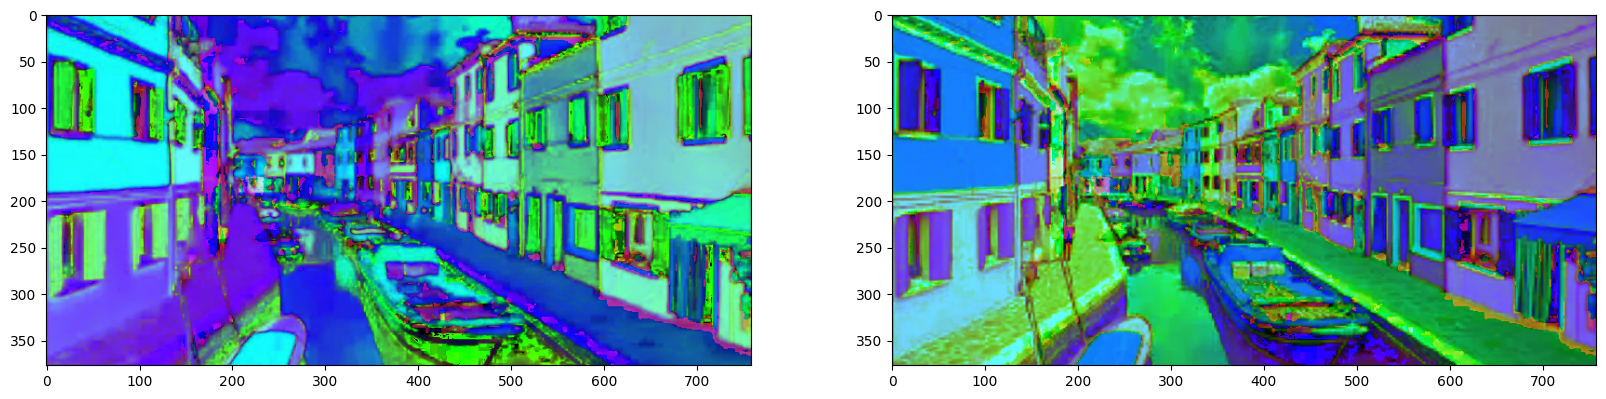

In [14]:
# Transform the image into HSV and HLS models
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

# Plot the converted images
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols =2, figsize = (20, 20))
ax1.imshow(img_hsv)
ax2.imshow(img_hls)

plt.show()

笔记: 使用 `cv.cvtColor(src, code, dst)` 控制颜色空间
https://w3schools.cn/opencv_python/opencv_python_color_spaces.html

### 4 在图像上绘制矩形

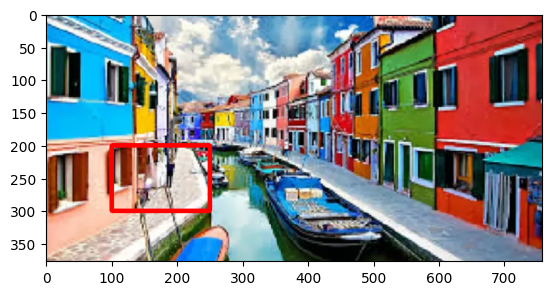

In [17]:
# Copy the image
img_copy = img.copy()

# Draw a rectangle
cv2.rectangle(img_copy, pt1 = (100, 200), pt2 =(250, 300),
              color = (255, 0, 0), thickness = 5)

plt.imshow(img_copy)

笔记: 需要调整矩形的大小和位置参数
https://w3schools.cn/opencv_python/opencv_python_drawshapes_text.html

### 5 绘制圆

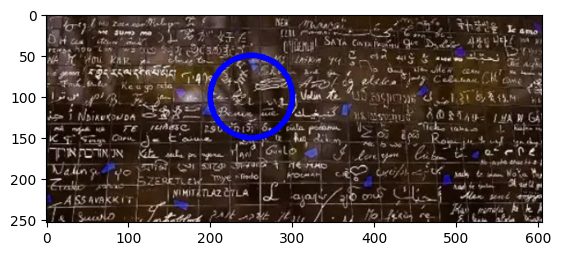

In [29]:
img_copy = cv2.imread('black.png')
# Draw a circle
cv2.circle(img_copy, center = (250, 100), radius =50,
           color = (0, 0, 255), thickness = 5)

plt.imshow(img_copy)

笔记: 
- 需要调整位置参数
- 使用 circle() 方法 绘制文本
- https://w3schools.cn/opencv_python/opencv_python_drawshapes_text.html

### 6 增加文本

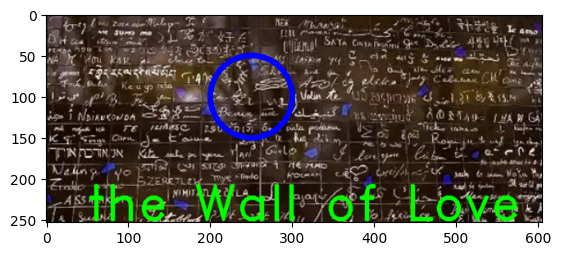

In [30]:
# Add text
cv2.putText(img_copy, text = "the Wall of Love",
            org = (50, 250),
            fontFace = cv2.FONT_HERSHEY_DUPLEX,
            fontScale = 2,
            color = (0, 255, 0),
            thickness = 2,
            lineType = cv2.LINE_AA)

plt.imshow(img_copy)

笔记: 使用 putText() 方法 绘制文本
https://w3schools.cn/opencv_python/opencv_python_drawshapes_text.html

### 7 滤波

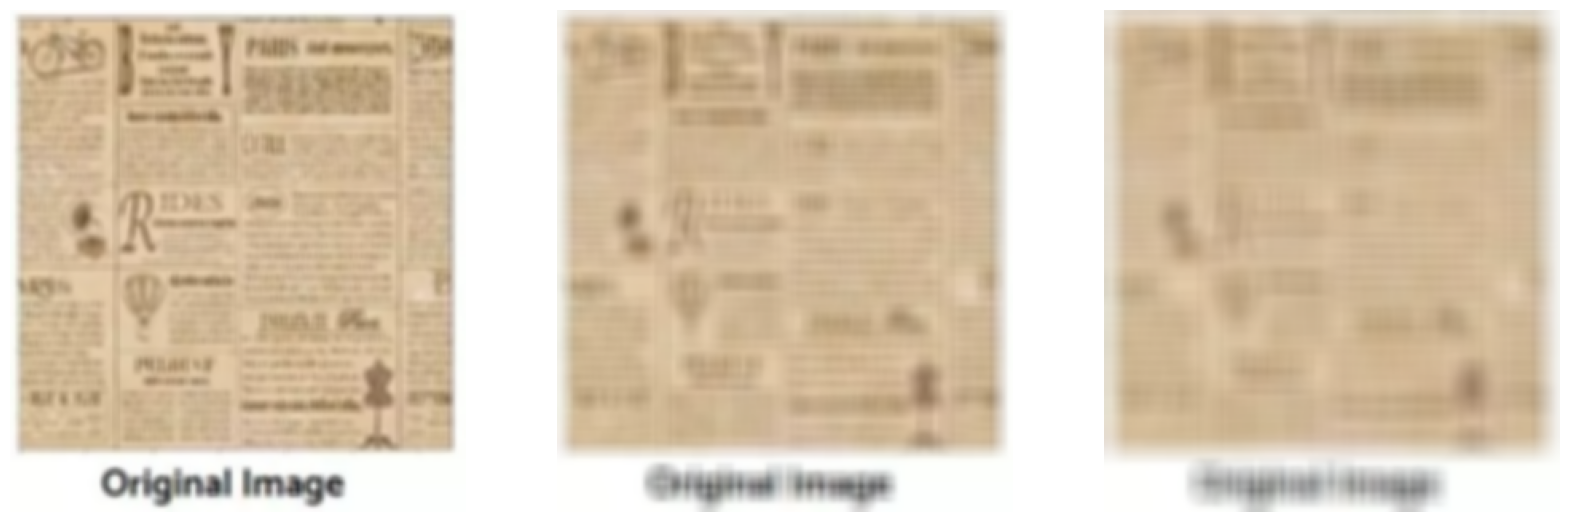

In [42]:
# Import the image and convert to RGB 
img = cv2.imread('text.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot the image with different kernel sizes
kernels = [5, 11, 17]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for ind, s in enumerate(kernels):
    img_blurred = cv2.blur(img, ksize = (s, s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
plt.show()

笔记: 使用 `blur()` 实现模糊
https://w3schools.cn/opencv_python/opencv_python_image_filtering.html

### 8 滤波、高斯滤波、中值滤波、双边滤波

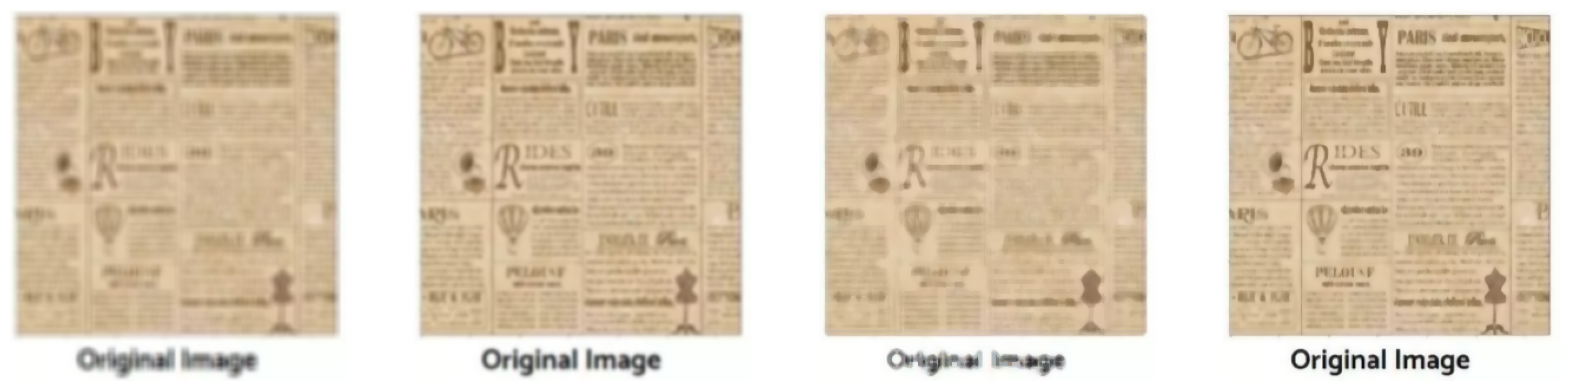

In [43]:
# Blur the image 
img_0 = cv2.blur(img, ksize = (7, 7))
img_1 = cv2.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)   
img_2 = cv2.medianBlur(img, 7)
img_3 = cv2.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)
# Plot the images
images = [img_0, img_1, img_2, img_3]
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 20))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
plt.show()

笔记: 其实就是几种不同的模糊算法 

http://www.juzicode.com/opencv-python-gaussianblur-bilateralfilter/

### 9 自适应阈值化

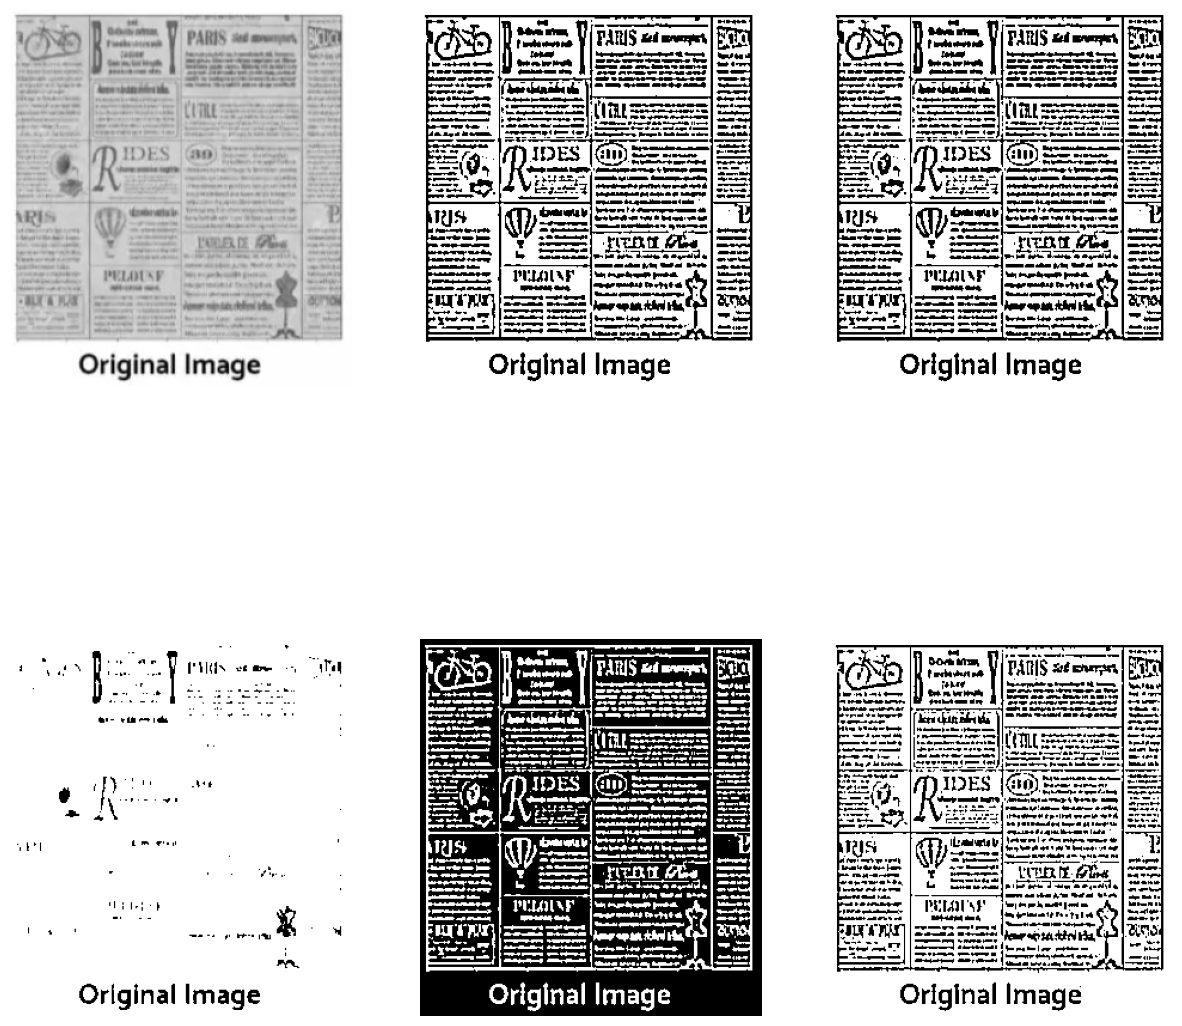

In [45]:
# Convert the image to grayscale
img = cv2.imread('text.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Adaptive Thresholding
_, thresh_binary = cv2.threshold(img, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
adap_mean_2 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 5)
adap_mean_2_inv = cv2.adaptiveThreshold(img, 255, 
                                        cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 7, 5)
adap_mean_8 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 5)
adap_gaussian_8 = cv2.adaptiveThreshold(img, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 7, 5)

# Plot the images
images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, 
          adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

笔记: 感觉是浮雕特效
- https://www.cnblogs.com/GaloisY/p/11037350.html
- https://www.cnblogs.com/pacino12134/p/11429379.html

### 10 梯度（Gradient）

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


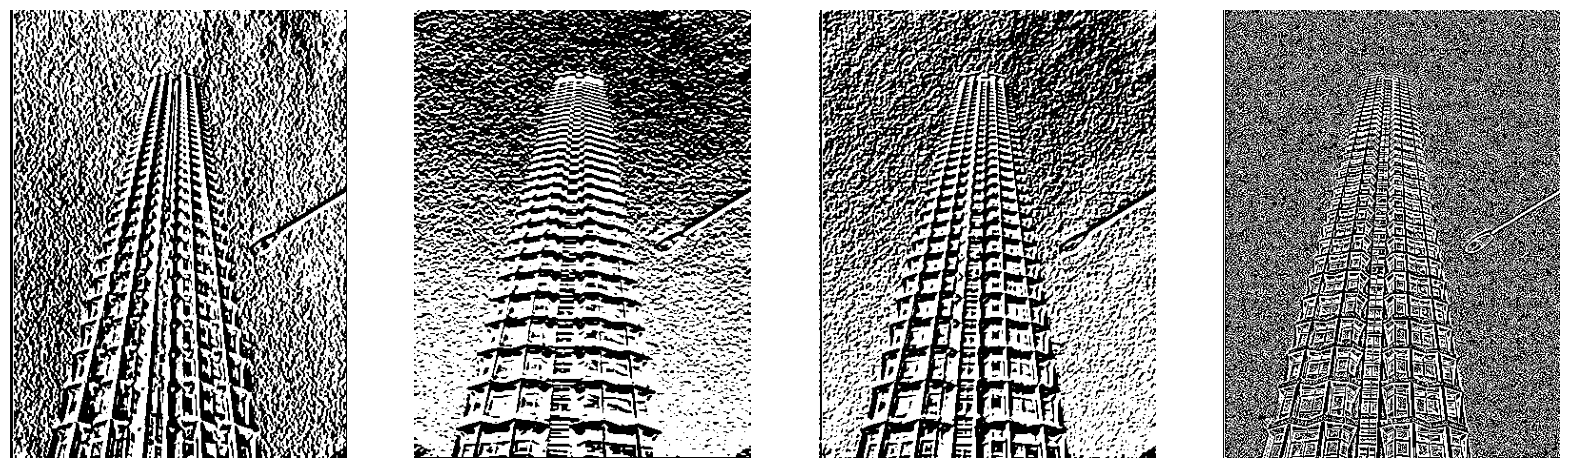

In [46]:
img = cv2.imread('Gradient.png')

# Apply gradient filtering
sobel_x = cv2.Sobel(img, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
blended = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma=0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Plot the images
images = [sobel_x, sobel_y, blended, laplacian]
plt.figure(figsize = (20, 20))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('off')
plt.show()


笔记: 可以类比素描的阴影方向
https://www.cnblogs.com/sdu20112013/p/11608469.html

### 11 腐蚀

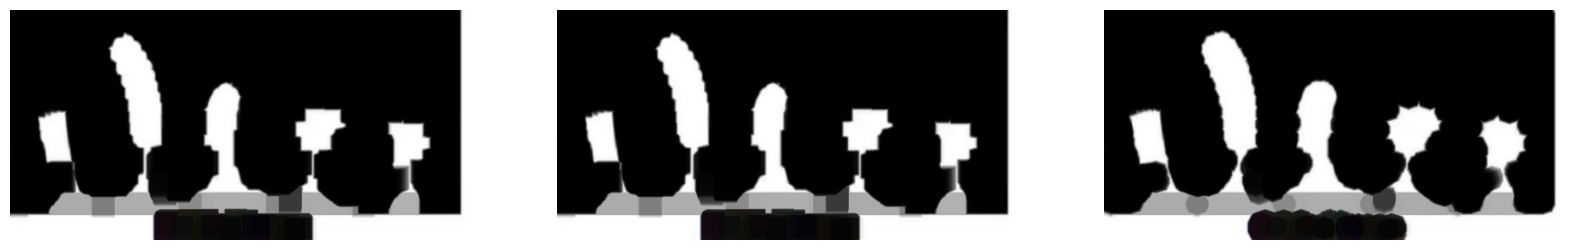

In [47]:
img = cv2.imread('simpson.jpg')
# Create erosion kernels 
kernel_0 = np.ones((9, 9), np.uint8)
kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
kernels = [kernel_0, kernel_1, kernel_2]
# Plot the images
plt.figure(figsize = (20, 20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv2.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
plt.show()

笔记: 腐蚀 -> 增强黑色吃掉白色
https://cloud.tencent.com/developer/article/2301392

### 12 膨胀

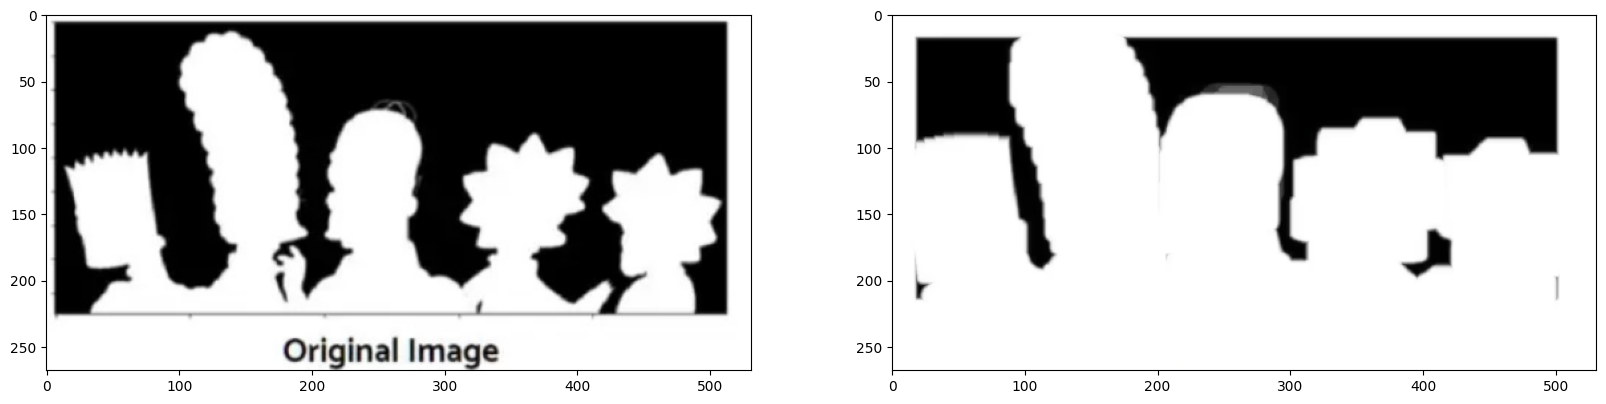

In [48]:
# Apply dilation
kernel = np.ones((9, 9), np.uint8)
img_dilate = cv2.dilate(img, kernel, iterations = 3)
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1); plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2); plt.imshow(img_dilate, cmap="gray")
plt.show()

笔记: 膨胀 -> 增强白色吃掉黑色
https://cloud.tencent.com/developer/article/2301392

### 13 开、闭、梯度、Tophat、Blackhot

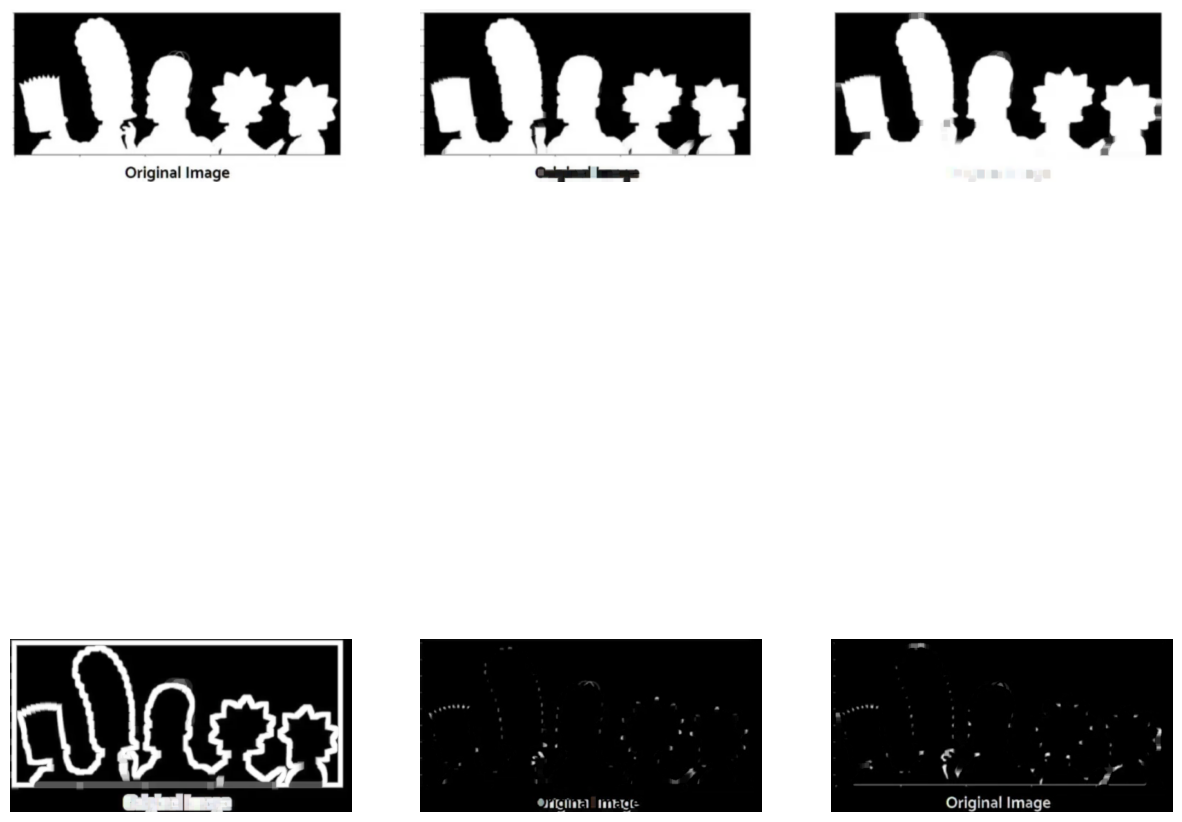

In [49]:
# Apply the operations
kernel = np.ones((9, 9), np.uint8)
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
img_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
img_tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
img_blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# Plot the images
images = [img, img_open, img_close, img_grad, img_tophat, img_blackhat]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
for ind, p in enumerate(images):
    ax = axs[ind // 3, ind % 3]
    ax.imshow(p, cmap='gray')
    ax.axis('off')
plt.show()


笔记: 进行了一些形态学操作，包括开运算、闭运算、梯度运算、顶帽运算和黑帽运算
可以使用 `cv2.morphologyEx()` 函数来实现这些操作
https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

### 14 自适应分割

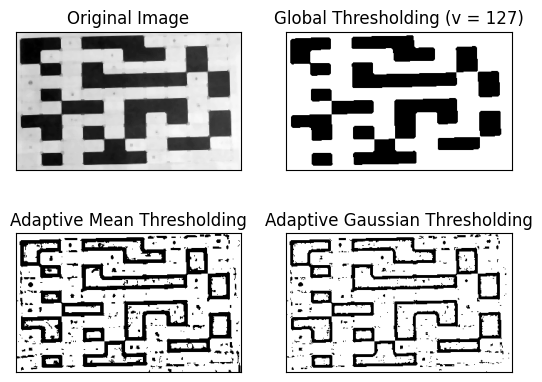

In [51]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('sudoku.png',0)
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

笔记: 原始图像、全局阈值处理 (v = 127)、自适应平均阈值处理、自适应高斯阈值处理

正在使用OpenCV的全局阈值处理和自适应阈值处理。
这里，`cv.threshold()`函数用于应用全局阈值处理，`img`是输入的图像，`127`是阈值，`255`是最大值，`cv.THRESH_BINARY`是阈值类型。

`cv.adaptiveThreshold()`函数用于应用自适应阈值处理，`img`是输入的图像，`255`是最大值，`cv.ADAPTIVE_THRESH_MEAN_C`和`cv.ADAPTIVE_THRESH_GAUSSIAN_C`是自适应方法，`cv.THRESH_BINARY`是阈值类型，`11`是邻域大小，`2`是从计算的平均值或加权平均值中减去的常数。在`th2`中，使用的是均值自适应阈值处理，它将阈值设置为邻域的平均值。在`th3`中，使用的是高斯自适应阈值处理，它将阈值设置为邻域的加权平均值，权重是高斯窗口。

### 15 分水岭分割

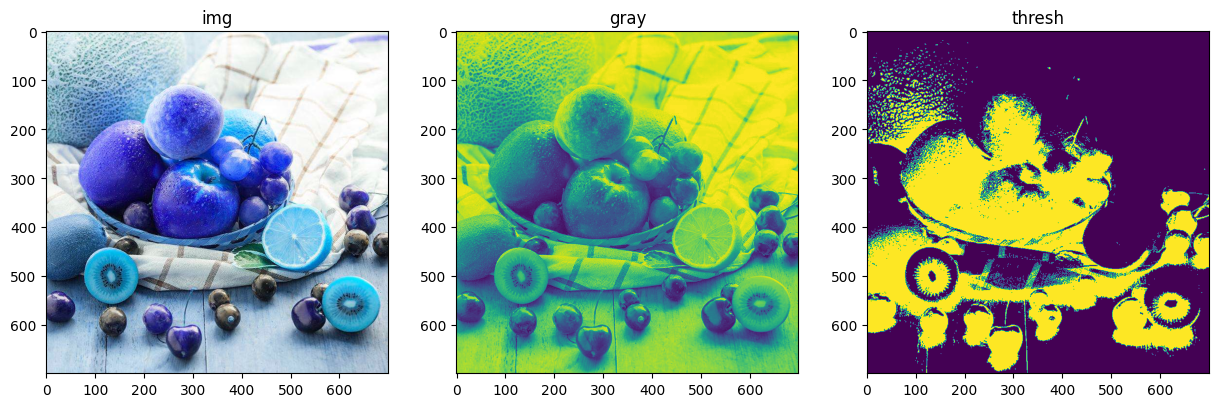

In [67]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('coins.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# Display the images
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1), plt.imshow(img), plt.title('img')
plt.subplot(1, 3, 2), plt.imshow(gray), plt.title('gray')
plt.subplot(1, 3, 3), plt.imshow(thresh), plt.title('thresh')
plt.show()


笔记: 检测深度的一个算法 https://opencv-python-tutorials.readthedocs.io/zh/latest/4.%20OpenCV%E4%B8%AD%E7%9A%84%E5%9B%BE%E5%83%8F%E5%A4%84%E7%90%86/4.15.%20%E5%9F%BA%E4%BA%8E%E5%88%86%E6%B0%B4%E5%B2%AD%E7%AE%97%E6%B3%95%E7%9A%84%E5%9B%BE%E5%83%8F%E5%88%86%E5%89%B2/

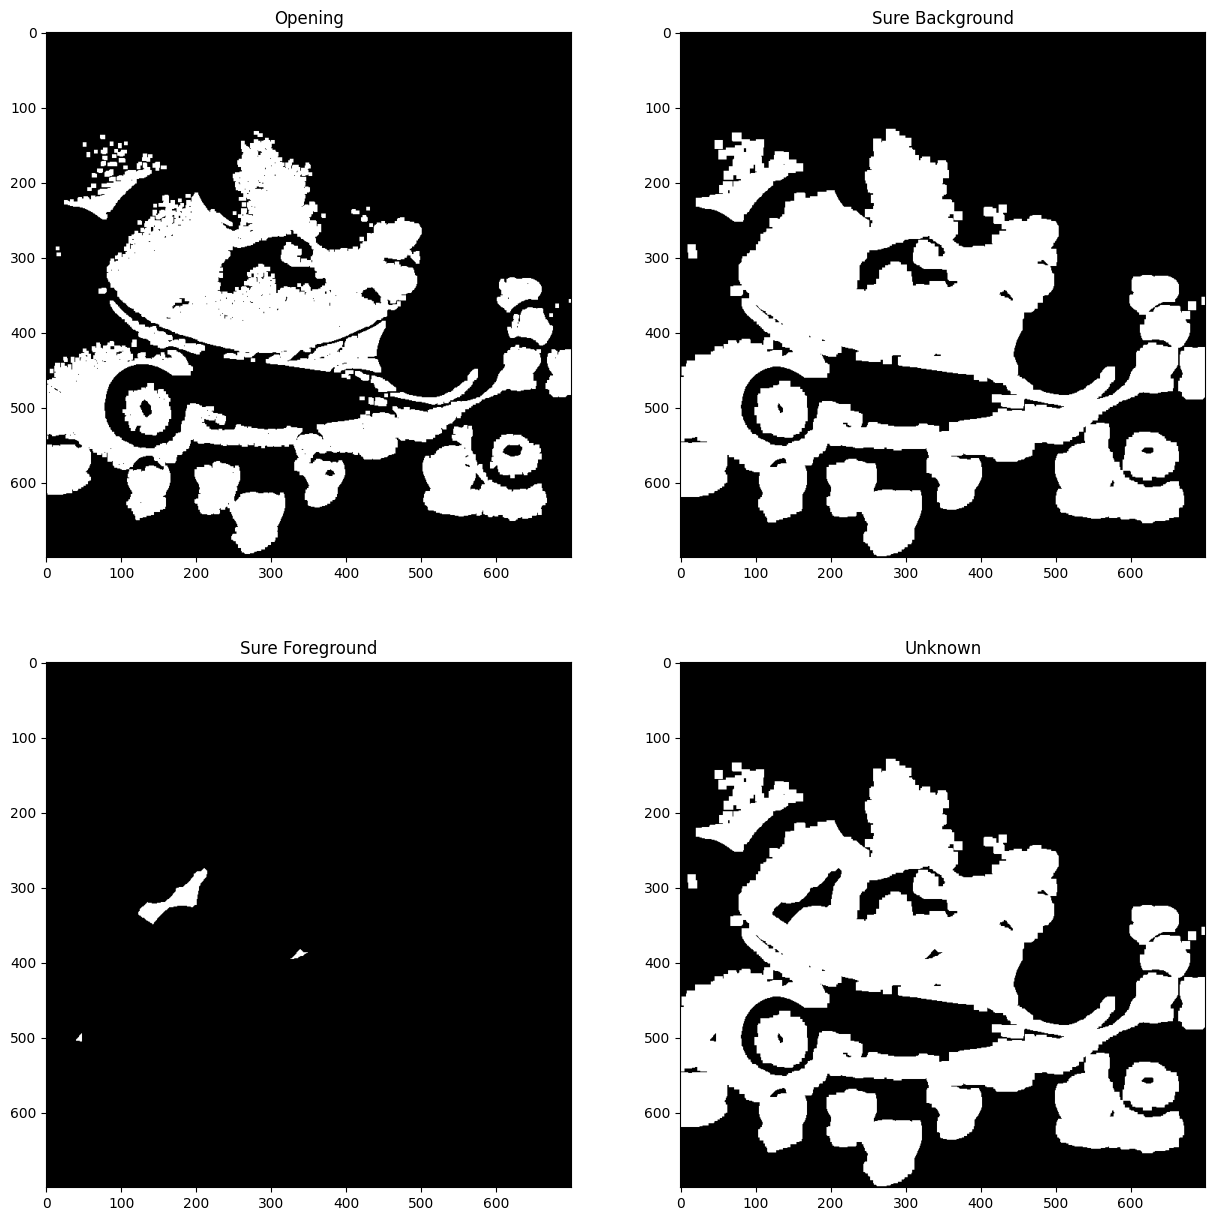

In [65]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Display the images
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1), plt.imshow(opening, 'gray'), plt.title('Opening')
plt.subplot(2, 2, 2), plt.imshow(sure_bg, 'gray'), plt.title('Sure Background')
plt.subplot(2, 2, 3), plt.imshow(sure_fg, 'gray'), plt.title('Sure Foreground')
plt.subplot(2, 2, 4), plt.imshow(unknown, 'gray'), plt.title('Unknown')
plt.show()

运算后的图像、确定的背景区域、确定的前景区域、未知区域

### 16 Grabcut

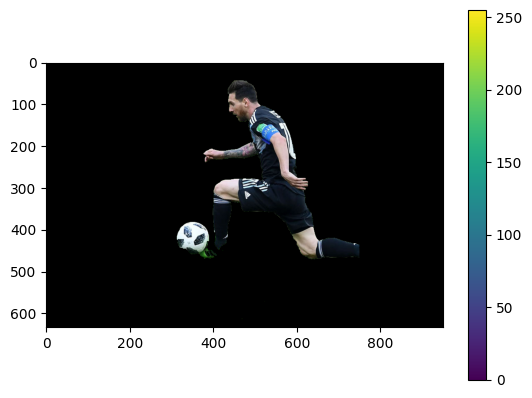

(<matplotlib.image.AxesImage at 0x213840ede10>,
 None)

In [92]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# 读取图像
img = cv.imread('messi5.jpg')

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (250,40,500,700)  #修改矩形框住梅西

# 使用GrabCut算法
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

# 显示图像
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img),plt.colorbar(),plt.show()

可以看到鞋子还没有扣到, 下面我们手动标记一下, 得到这样的图片 (自己去PS画一下)

[![picpuDO.png](https://z1.ax1x.com/2023/12/05/picpuDO.png)](https://imgse.com/i/picpuDO)

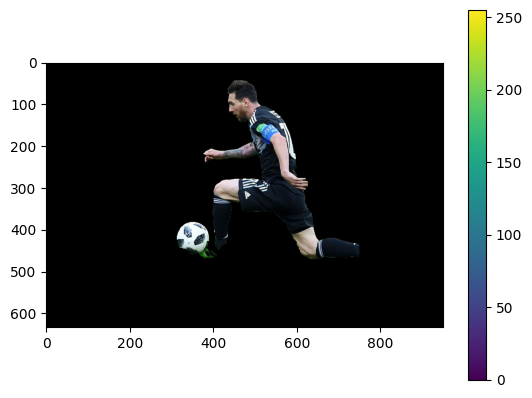

(<matplotlib.image.AxesImage at 0x21386d44e50>,
 None)

In [101]:
# 读取手动标记的掩码图像
newmask = cv.imread('newmask4.png',0)

# 在掩码图像中，白色区域标记为确定的前景，黑色区域标记为确定的背景
mask[newmask == 0] = 0
mask[newmask == 255] = 1

mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
imgf = img*mask[:,:,np.newaxis]

plt.imshow(imgf),plt.colorbar(),plt.show()

笔记: 经调试后发现, 无论怎样更改mask图, 也没能改善抠图质量, 如果不是代码的问题的话, 可能这就是这个算法的局限性
- https://opencv-python-tutorials.readthedocs.io/zh/latest/4.%20OpenCV%E4%B8%AD%E7%9A%84%E5%9B%BE%E5%83%8F%E5%A4%84%E7%90%86/4.16.%20%E5%9F%BA%E4%BA%8EGrabCut%E7%AE%97%E6%B3%95%E7%9A%84%E4%BA%A4%E4%BA%92%E5%BC%8F%E5%89%8D%E6%99%AF%E6%8F%90%E5%8F%96/